# Importing required packages

In [1]:
import cv2, os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from matplotlib.image import imread
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import models, layers, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import VGG19

from keras.applications.resnet50 import preprocess_input
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.preprocessing import image


from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

# Data Preparation

## Setting data directory

In [ ]:
data_dir = './images'

## Test Train Split

In [25]:
datagen = ImageDataGenerator(validation_split=0.3, preprocessing_function=preprocess_input)

### Train Data Selection


In [26]:
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224,224),
    batch_size=64,
    shuffle=True,
    class_mode='binary',
    subset='training'
)

print("Number of batches in training data :", len(train_generator))

Found 8792 images belonging to 2 classes.
Number of batches in training data : 138


### Test Data Selection

In [27]:
test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary',
    subset='validation'
) 


print("Number of batches in testing data :", len(test_generator))

Found 3767 images belonging to 2 classes.
Number of batches in testing data : 59


# Model

## Creating Model

In [28]:
CNNmodel_7 = keras.Sequential([
    layers.Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(1024, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    
    # Reduce the kernel size here to avoid output size issues
    layers.Conv2D(2048, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(128, activation='relu', kernel_regularizer='l1'),
    
    layers.Dense(1, activation='sigmoid')
])


CNNmodel_7.summary()

steps_per_epoch_training = len(train_generator)
steps_per_epoch_testing = len(test_generator)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 10, 10, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 10, 10, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 3, 3, 1024)     │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 3, 3, 1024)     │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 1, 1, 2048)     │    18,876,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 1, 1, 2048)     │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 25,738,433 (98.18 MB)

 Trainable params: 25,730,305 (98.15 MB)

 Non-trainable params: 8,128 (31.75 KB)

## Setting Compile parameters

In [29]:
CNNmodel_7.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

In [30]:
filepath = './cp.keras'

checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max', 
                             verbose=1)

In [31]:
from tensorflow.keras.callbacks import EarlyStopping


early_stopping = EarlyStopping(
                    monitor='val_accuracy',  
                    patience=5,              # Stop after 5 epochs without improvement
                    min_delta=0.0,           # Any change in accuracy is considered an improvement
                    verbose=1,               
                    mode='max',              
                    baseline=0.99            # Early stopping only triggers if validation accuracy exceeds 99%
)

# Training Model

In [32]:
history = CNNmodel_7.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator,
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.9310 - loss: 12.7928 
Epoch 1: val_accuracy improved from -inf to 0.74250, saving model to ./cp.keras
138/138 ━━━━━━━━━━━━━━━━━━━━ 2042s 15s/step - accuracy: 0.9313 - loss: 12.7513 - val_accuracy: 0.7425 - val_loss: 0.8438
Epoch 2/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.9907 - loss: 0.1740 
Epoch 2: val_accuracy improved from 0.74250 to 0.90788, saving model to ./cp.keras
138/138 ━━━━━━━━━━━━━━━━━━━━ 1711s 12s/step - accuracy: 0.9907 - loss: 0.1738 - val_accuracy: 0.9079 - val_loss: 0.3436
Epoch 3/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.9949 - loss: 0.0968 
Epoch 3: val_accuracy did not improve from 0.90788
138/138 ━━━━━━━━━━━━━━━━━━━━ 1830s 13s/step - accuracy: 0.9949 - loss: 0.0968 - val_accuracy: 0.8110 - val_loss: 0.6225
Epoch 4/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.9946 - loss: 0.0888 
Epoch 4: val_accuracy did not improve from 0.90788
138/138 ━━━━━━━━━━━━━━━━━━━━ 

### Saving Model

In [33]:
CNNmodel_7.save('CNN_7_Layers.h5')

# Visualizing Data

Text(0.5, 1.0, 'Training and Validation loss')

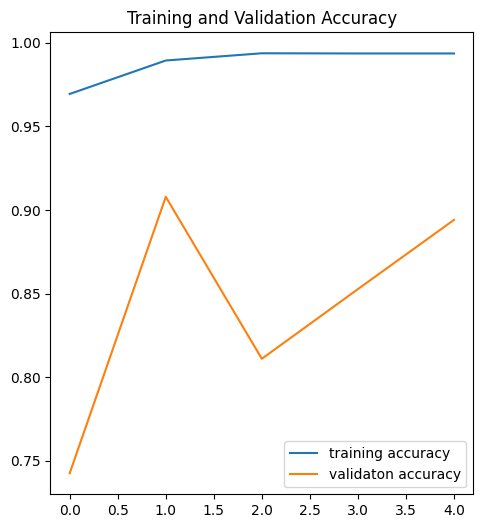

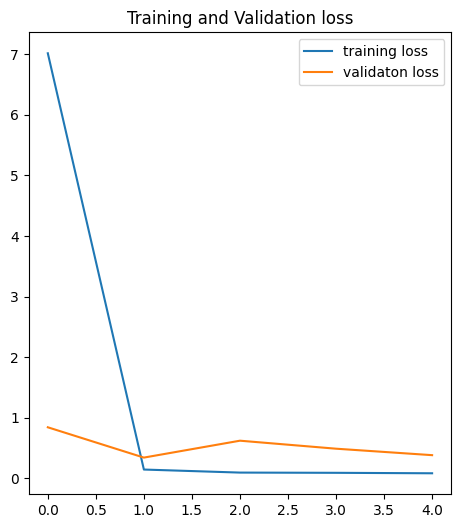

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss =history.history['loss']
val_loss = history.history['val_loss']

EPOCHS = len(acc)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label = 'training accuracy')
plt.plot(range(EPOCHS), val_acc, label='validaton accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), loss, label = 'training loss')
plt.plot(range(EPOCHS), val_loss, label='validaton loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')

# Prediction

In [35]:
best = load_model(filepath)

In [36]:
test_accuracy = best.evaluate(test_generator)

59/59 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.9144 - loss: 0.3224
